# Gradient Descent Linear Regression

In [122]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [104]:
class LinearRegressionOLS(object):
    
    def __init__(self):
        
        self.cost = []
        
    def fit(self, X, y):
        X = sm.add_constant(X)
        m, n = X.shape
        self.theta = np.ones(n)
        
        self.theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        
    
    def predict(self, X):
        X = sm.add_constant(X)
        return np.dot(X, self.theta)
    
    def get_parmas(self):
        return self.theta
    

In [75]:
class LinearRegressionGD(object):
    
    def __init__(self):
        
#         self.theta = theta 
        self.cost = []
        
    def fit(self, X, y, alpha, numIterations):
        X_transpose = X.transpose()
        m, n = X.shape
        self.theta = np.ones(n)
        
        for i in range(0, numIterations):
            pred = np.dot(X, self.theta)
            loss = pred - y
            cost = np.sum(loss **2) / (2 * m)
            gradient = np.dot(X_transpose, loss) / m
            self.theta = self.theta - alpha * gradient
            if i % 1000 == 0:
                self.cost.append(cost)
        return self.theta
    
    def predict(self, X):
        X = sm.add_constant(X)
        return np.dot(X, self.theta)
    
    def get_parmas(self):
        return self.theta
    

In [66]:
import pandas as pd

dat = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
                 header = None, sep = '\s+')

dat.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Simple Linear Regression

### Gradient Descent

In [124]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X = dat.RM
X = sm.add_constant(X)
y = dat.MEDV

X = ss.fit_transform(X)
y = ss.fit_transform(y)

numIterations= 100000
alpha = 0.00005

clf = LinearRegressionGD()
clf.fit(X, y, alpha = alpha, numIterations = numIterations)
pred = clf.predict(X)
print 'Parameters:', clf.get_parmas()
print 'RMSE:', np.sqrt(np.mean(np.sum((y - pred)**2)))

Parameters: [ 1.          0.69741234]
RMSE: 16.1659596281


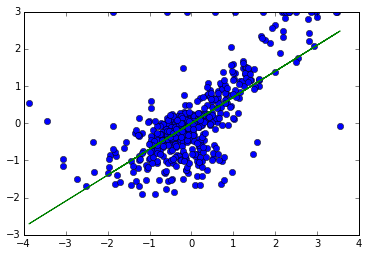

In [127]:
plt.plot(X[:, 1], y, 'o')
plt.plot(X[:, 1], pred)

### Sklearn Way

In [128]:
from sklearn.linear_model import LinearRegression

X = dat.RM
X = sm.add_constant(X)
y = dat.MEDV

clf = LinearRegression()
clf.fit(X, y)
pred = clf.predict(X)
print clf.coef_
print clf.intercept_

[ 0.          9.10210898]
-34.6706207764


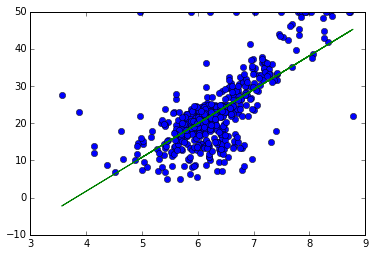

In [129]:
plt.plot(dat.RM, dat.MEDV, 'o')
plt.plot(dat.RM, pred)

### Ordinary Leat Squares

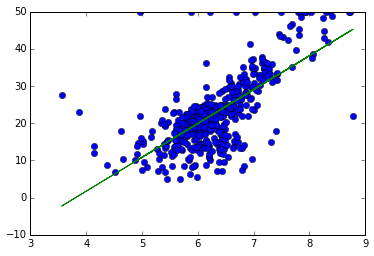

In [130]:
pred = dat.RM * theta1 + theta0

plt.plot(dat.RM, dat.MEDV, 'o')
plt.plot(dat.RM, pred)

### OLS

Params: [-34.67062078   9.10210898]


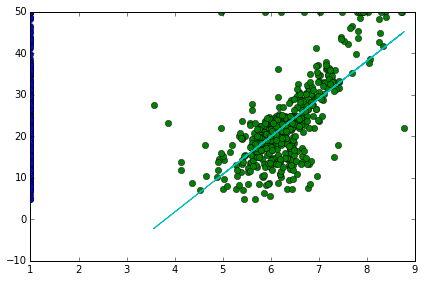

In [131]:
clf = LinearRegressionOLS()
clf.fit(X, y)
pred = clf.predict(X)
print 'Params:', clf.get_parmas()

plt.plot(X, y, 'o')
plt.plot(X, pred)
plt.tight_layout()